In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
df = pd.read_csv('~/dropbox/python숙달/data/depp/trees.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


# Volume을 예측해 보세요. 정규화
- Girth 8.8, 10.5
- Height 63, 72

In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

## 정규화

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
x_pred = np.array([[8.8, 63], [10.5, 72]])

In [7]:
scaler1 = MinMaxScaler()
scaler1.fit(x)
x_scaled = scaler1.transform(x)
x_pred_scaled = scaler1.transform(x_pred)

In [8]:
pd.DataFrame(x_pred) 

,0,1
0,8.8,63.0
1,10.5,72.0


## tf version

In [9]:
x_data = tf.constant(x_scaled, tf.float32)
y_data = tf.constant(y, tf.float32)

In [10]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [11]:
def compute_loss():
    hx = tf.matmul(x_data, w) + b
    cost = tf.reduce_mean((hx - y_data) ** 2)
    return cost

In [12]:
optimizer = Adam(0.1)
patience = 100
pcnt = 0
hist_cost = []
min_delta = 0.001

for epoch in range(3000):
    optimizer.minimize(compute_loss, var_list = [w, b])
    cost = compute_loss().numpy()
    hist_cost.append( cost )
    print(epoch, "cost = ", cost)
    if epoch > 0:
        if hist_cost[epoch - 1] - hist_cost[epoch] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt > patience:
            print("early stopping")
            break
        else:
            continue

0 cost =  1129.6925
1 cost =  1116.9719
2 cost =  1104.3342
3 cost =  1091.781
4 cost =  1079.3135
5 cost =  1066.933
6 cost =  1054.6406
7 cost =  1042.4377
8 cost =  1030.3253
9 cost =  1018.3047
10 cost =  1006.37665
11 cost =  994.54236
12 cost =  982.80255
13 cost =  971.1584
14 cost =  959.61053
15 cost =  948.15985
16 cost =  936.80695
17 cost =  925.5525
18 cost =  914.3973
19 cost =  903.3416
20 cost =  892.38605
21 cost =  881.5311
22 cost =  870.7772
23 cost =  860.12445
24 cost =  849.5732
25 cost =  839.1237
26 cost =  828.77625
27 cost =  818.5308
28 cost =  808.38745
29 cost =  798.34625
30 cost =  788.4071
31 cost =  778.5701
32 cost =  768.8351
33 cost =  759.2017
34 cost =  749.6701
35 cost =  740.23987
36 cost =  730.91077
37 cost =  721.68256
38 cost =  712.55493
39 cost =  703.52747
40 cost =  694.6
41 cost =  685.7719
42 cost =  677.04285
43 cost =  668.4124
44 cost =  659.8802
45 cost =  651.44556
46 cost =  643.10803
47 cost =  634.8672
48 cost =  626.72253
49 c

425 cost =  80.920555
426 cost =  80.81944
427 cost =  80.71835
428 cost =  80.61732
429 cost =  80.516304
430 cost =  80.41534
431 cost =  80.31441
432 cost =  80.213524
433 cost =  80.11265
434 cost =  80.011826
435 cost =  79.91105
436 cost =  79.810295
437 cost =  79.709564
438 cost =  79.60891
439 cost =  79.50827
440 cost =  79.40766
441 cost =  79.30711
442 cost =  79.206566
443 cost =  79.10607
444 cost =  79.00562
445 cost =  78.90521
446 cost =  78.804825
447 cost =  78.70448
448 cost =  78.60418
449 cost =  78.50391
450 cost =  78.4037
451 cost =  78.303505
452 cost =  78.20333
453 cost =  78.10323
454 cost =  78.00316
455 cost =  77.903114
456 cost =  77.80312
457 cost =  77.70316
458 cost =  77.603264
459 cost =  77.50338
460 cost =  77.40356
461 cost =  77.30376
462 cost =  77.204
463 cost =  77.104294
464 cost =  77.00463
465 cost =  76.90502
466 cost =  76.80543
467 cost =  76.70588
468 cost =  76.606384
469 cost =  76.506935
470 cost =  76.40751
471 cost =  76.30815
47

850 cost =  44.104168
851 cost =  44.03732
852 cost =  43.970577
853 cost =  43.903923
854 cost =  43.83739
855 cost =  43.770958
856 cost =  43.70462
857 cost =  43.638393
858 cost =  43.572266
859 cost =  43.506233
860 cost =  43.440323
861 cost =  43.374504
862 cost =  43.30879
863 cost =  43.24317
864 cost =  43.17766
865 cost =  43.112267
866 cost =  43.046986
867 cost =  42.98178
868 cost =  42.916702
869 cost =  42.851704
870 cost =  42.78682
871 cost =  42.722034
872 cost =  42.65735
873 cost =  42.592762
874 cost =  42.528286
875 cost =  42.463924
876 cost =  42.399654
877 cost =  42.335495
878 cost =  42.27142
879 cost =  42.207466
880 cost =  42.14361
881 cost =  42.079857
882 cost =  42.016205
883 cost =  41.952656
884 cost =  41.8892
885 cost =  41.825874
886 cost =  41.762623
887 cost =  41.699486
888 cost =  41.636456
889 cost =  41.573524
890 cost =  41.51069
891 cost =  41.447964
892 cost =  41.385338
893 cost =  41.322823
894 cost =  41.260395
895 cost =  41.19808
896

1285 cost =  23.98259
1286 cost =  23.95417
1287 cost =  23.92582
1288 cost =  23.89754
1289 cost =  23.869322
1290 cost =  23.841171
1291 cost =  23.813086
1292 cost =  23.785063
1293 cost =  23.757109
1294 cost =  23.729223
1295 cost =  23.7014
1296 cost =  23.673635
1297 cost =  23.64595
1298 cost =  23.61832
1299 cost =  23.590757
1300 cost =  23.563255
1301 cost =  23.535822
1302 cost =  23.50845
1303 cost =  23.48114
1304 cost =  23.453901
1305 cost =  23.42673
1306 cost =  23.399612
1307 cost =  23.372562
1308 cost =  23.345573
1309 cost =  23.318659
1310 cost =  23.291805
1311 cost =  23.265007
1312 cost =  23.23827
1313 cost =  23.21161
1314 cost =  23.185007
1315 cost =  23.15846
1316 cost =  23.131985
1317 cost =  23.105576
1318 cost =  23.07922
1319 cost =  23.052935
1320 cost =  23.026697
1321 cost =  23.00054
1322 cost =  22.974438
1323 cost =  22.948393
1324 cost =  22.922415
1325 cost =  22.8965
1326 cost =  22.870646
1327 cost =  22.844847
1328 cost =  22.819124
1329 c

1716 cost =  16.482964
1717 cost =  16.473738
1718 cost =  16.46454
1719 cost =  16.45537
1720 cost =  16.446228
1721 cost =  16.437113
1722 cost =  16.428007
1723 cost =  16.418941
1724 cost =  16.4099
1725 cost =  16.400888
1726 cost =  16.391893
1727 cost =  16.38293
1728 cost =  16.373997
1729 cost =  16.365084
1730 cost =  16.356201
1731 cost =  16.34734
1732 cost =  16.338501
1733 cost =  16.329685
1734 cost =  16.320902
1735 cost =  16.312143
1736 cost =  16.30341
1737 cost =  16.294699
1738 cost =  16.286013
1739 cost =  16.277359
1740 cost =  16.268723
1741 cost =  16.260117
1742 cost =  16.251534
1743 cost =  16.242971
1744 cost =  16.234434
1745 cost =  16.225924
1746 cost =  16.21744
1747 cost =  16.208979
1748 cost =  16.200537
1749 cost =  16.192125
1750 cost =  16.183743
1751 cost =  16.175377
1752 cost =  16.167036
1753 cost =  16.158726
1754 cost =  16.150433
1755 cost =  16.14216
1756 cost =  16.13392
1757 cost =  16.125698
1758 cost =  16.117506
1759 cost =  16.10933

2153 cost =  14.234437
2154 cost =  14.232067
2155 cost =  14.229698
2156 cost =  14.227343
2157 cost =  14.224999
2158 cost =  14.222654
2159 cost =  14.220317
2160 cost =  14.217999
2161 cost =  14.215679
2162 cost =  14.213375
2163 cost =  14.211067
2164 cost =  14.208777
2165 cost =  14.206491
2166 cost =  14.204214
2167 cost =  14.201942
2168 cost =  14.199684
2169 cost =  14.197425
2170 cost =  14.195178
2171 cost =  14.19294
2172 cost =  14.190703
2173 cost =  14.188482
2174 cost =  14.186262
2175 cost =  14.184052
2176 cost =  14.181853
2177 cost =  14.179656
2178 cost =  14.17747
2179 cost =  14.175293
2180 cost =  14.17312
2181 cost =  14.170958
2182 cost =  14.168797
2183 cost =  14.166646
2184 cost =  14.164502
2185 cost =  14.16237
2186 cost =  14.160241
2187 cost =  14.158118
2188 cost =  14.156006
2189 cost =  14.1539
2190 cost =  14.151802
2191 cost =  14.149708
2192 cost =  14.147622
2193 cost =  14.145549
2194 cost =  14.143473
2195 cost =  14.141417
2196 cost =  14.1

In [13]:
def hxfn(xdata):
    xdata = tf.constant(xdata, tf.float32)
    hx = tf.matmul(xdata, w) + b
    return hx.numpy()

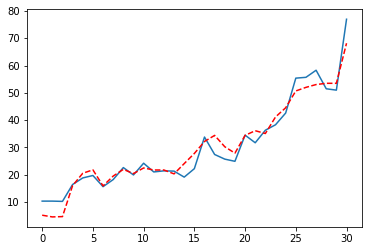

In [14]:
plt.plot( y)
plt.plot( hxfn( x_scaled) ,'r--')
plt.show()

In [15]:
df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [16]:
hxfn(x_pred_scaled)

array([[ 4.621542 ],
       [15.9973545]], dtype=float32)

## Keras version

In [17]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
dense = Dense( units = 1, input_dim = 2)
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
earlyStop = EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 100)
h = model.fit(x_data, y_data, epochs = 15000, callbacks = [earlyStop])

Epoch 1/15000
1/1 [==============================] - 0s 986us/step - loss: 1257.9304
Epoch 2/15000
1/1 [==============================] - 0s 0s/step - loss: 1244.4535
Epoch 3/15000
1/1 [==============================] - 0s 1ms/step - loss: 1231.0582
Epoch 4/15000
1/1 [==============================] - 0s 0s/step - loss: 1217.7458
Epoch 5/15000
1/1 [==============================] - 0s 1ms/step - loss: 1204.5183
Epoch 6/15000
1/1 [==============================] - 0s 999us/step - loss: 1191.3761
Epoch 7/15000
1/1 [==============================] - 0s 0s/step - loss: 1178.3209
Epoch 8/15000
1/1 [==============================] - 0s 998us/step - loss: 1165.3541
Epoch 9/15000
1/1 [==============================] - 0s 998us/step - loss: 1152.4767
Epoch 10/15000
1/1 [==============================] - 0s 999us/step - loss: 1139.6898
Epoch 11/15000
1/1 [==============================] - 0s 1ms/step - loss: 1126.9945
Epoch 12/15000
1/1 [==============================] - 0s 1ms/step - loss: 1114

1/1 [==============================] - 0s 1ms/step - loss: 384.8470
Epoch 100/15000
1/1 [==============================] - 0s 0s/step - loss: 380.1264
Epoch 101/15000
1/1 [==============================] - 0s 1ms/step - loss: 375.4709
Epoch 102/15000
1/1 [==============================] - 0s 0s/step - loss: 370.8798
Epoch 103/15000
1/1 [==============================] - 0s 1ms/step - loss: 366.3524
Epoch 104/15000
1/1 [==============================] - 0s 0s/step - loss: 361.8881
Epoch 105/15000
1/1 [==============================] - 0s 0s/step - loss: 357.4863
Epoch 106/15000
1/1 [==============================] - 0s 0s/step - loss: 353.1463
Epoch 107/15000
1/1 [==============================] - 0s 1ms/step - loss: 348.8676
Epoch 108/15000
1/1 [==============================] - 0s 1ms/step - loss: 344.6494
Epoch 109/15000
1/1 [==============================] - 0s 0s/step - loss: 340.4911
Epoch 110/15000
1/1 [==============================] - 0s 1000us/step - loss: 336.3922
Epoch 111/1

1/1 [==============================] - 0s 1000us/step - loss: 145.1522
Epoch 197/15000
1/1 [==============================] - 0s 1ms/step - loss: 144.1971
Epoch 198/15000
1/1 [==============================] - 0s 998us/step - loss: 143.2597
Epoch 199/15000
1/1 [==============================] - 0s 997us/step - loss: 142.3397
Epoch 200/15000
1/1 [==============================] - 0s 1ms/step - loss: 141.4368
Epoch 201/15000
1/1 [==============================] - 0s 1ms/step - loss: 140.5507
Epoch 202/15000
1/1 [==============================] - 0s 1000us/step - loss: 139.6811
Epoch 203/15000
1/1 [==============================] - 0s 1000us/step - loss: 138.8277
Epoch 204/15000
1/1 [==============================] - 0s 1ms/step - loss: 137.9902
Epoch 205/15000
1/1 [==============================] - 0s 0s/step - loss: 137.1684
Epoch 206/15000
1/1 [==============================] - 0s 1ms/step - loss: 136.3619
Epoch 207/15000
1/1 [==============================] - 0s 0s/step - loss: 135.57

1/1 [==============================] - 0s 0s/step - loss: 101.6618
Epoch 294/15000
1/1 [==============================] - 0s 1ms/step - loss: 101.4823
Epoch 295/15000
1/1 [==============================] - 0s 1ms/step - loss: 101.3050
Epoch 296/15000
1/1 [==============================] - 0s 0s/step - loss: 101.1299
Epoch 297/15000
1/1 [==============================] - 0s 0s/step - loss: 100.9568
Epoch 298/15000
1/1 [==============================] - 0s 1ms/step - loss: 100.7857
Epoch 299/15000
1/1 [==============================] - 0s 0s/step - loss: 100.6166
Epoch 300/15000
1/1 [==============================] - 0s 1ms/step - loss: 100.4494
Epoch 301/15000
1/1 [==============================] - 0s 1ms/step - loss: 100.2841
Epoch 302/15000
1/1 [==============================] - 0s 0s/step - loss: 100.1206
Epoch 303/15000
1/1 [==============================] - 0s 0s/step - loss: 99.9589
Epoch 304/15000
1/1 [==============================] - 0s 0s/step - loss: 99.7989
Epoch 305/15000
1

1/1 [==============================] - 0s 0s/step - loss: 89.2042
Epoch 392/15000
1/1 [==============================] - 0s 1ms/step - loss: 89.0989
Epoch 393/15000
1/1 [==============================] - 0s 1ms/step - loss: 88.9938
Epoch 394/15000
1/1 [==============================] - 0s 0s/step - loss: 88.8887
Epoch 395/15000
1/1 [==============================] - 0s 1ms/step - loss: 88.7838
Epoch 396/15000
1/1 [==============================] - 0s 1ms/step - loss: 88.6790
Epoch 397/15000
1/1 [==============================] - 0s 0s/step - loss: 88.5742
Epoch 398/15000
1/1 [==============================] - 0s 1ms/step - loss: 88.4696
Epoch 399/15000
1/1 [==============================] - 0s 0s/step - loss: 88.3651
Epoch 400/15000
1/1 [==============================] - 0s 0s/step - loss: 88.2607
Epoch 401/15000
1/1 [==============================] - 0s 1ms/step - loss: 88.1563
Epoch 402/15000
1/1 [==============================] - 0s 0s/step - loss: 88.0521
Epoch 403/15000
1/1 [=====

1/1 [==============================] - 0s 0s/step - loss: 79.1892
Epoch 490/15000
1/1 [==============================] - 0s 1ms/step - loss: 79.0892
Epoch 491/15000
1/1 [==============================] - 0s 1ms/step - loss: 78.9892
Epoch 492/15000
1/1 [==============================] - 0s 1000us/step - loss: 78.8892
Epoch 493/15000
1/1 [==============================] - 0s 1ms/step - loss: 78.7892
Epoch 494/15000
1/1 [==============================] - 0s 1ms/step - loss: 78.6893
Epoch 495/15000
1/1 [==============================] - 0s 0s/step - loss: 78.5894
Epoch 496/15000
1/1 [==============================] - 0s 1ms/step - loss: 78.4896
Epoch 497/15000
1/1 [==============================] - 0s 1ms/step - loss: 78.3898
Epoch 498/15000
1/1 [==============================] - 0s 1000us/step - loss: 78.2901
Epoch 499/15000
1/1 [==============================] - 0s 2ms/step - loss: 78.1904
Epoch 500/15000
1/1 [==============================] - 0s 999us/step - loss: 78.0908
Epoch 501/1500

1/1 [==============================] - 0s 0s/step - loss: 69.6221
Epoch 588/15000
1/1 [==============================] - 0s 1000us/step - loss: 69.5274
Epoch 589/15000
1/1 [==============================] - 0s 1ms/step - loss: 69.4328
Epoch 590/15000
1/1 [==============================] - 0s 0s/step - loss: 69.3383
Epoch 591/15000
1/1 [==============================] - 0s 999us/step - loss: 69.2439
Epoch 592/15000
1/1 [==============================] - 0s 0s/step - loss: 69.1495
Epoch 593/15000
1/1 [==============================] - 0s 1ms/step - loss: 69.0552
Epoch 594/15000
1/1 [==============================] - 0s 0s/step - loss: 68.9609
Epoch 595/15000
1/1 [==============================] - 0s 1ms/step - loss: 68.8667
Epoch 596/15000
1/1 [==============================] - 0s 1ms/step - loss: 68.7727
Epoch 597/15000
1/1 [==============================] - 0s 1ms/step - loss: 68.6786
Epoch 598/15000
1/1 [==============================] - 0s 0s/step - loss: 68.5847
Epoch 599/15000
1/1 

1/1 [==============================] - 0s 0s/step - loss: 60.7068
Epoch 686/15000
1/1 [==============================] - 0s 0s/step - loss: 60.6199
Epoch 687/15000
1/1 [==============================] - 0s 1000us/step - loss: 60.5331
Epoch 688/15000
1/1 [==============================] - 0s 1ms/step - loss: 60.4464
Epoch 689/15000
1/1 [==============================] - 0s 1ms/step - loss: 60.3598
Epoch 690/15000
1/1 [==============================] - 0s 1ms/step - loss: 60.2732
Epoch 691/15000
1/1 [==============================] - 0s 1ms/step - loss: 60.1868
Epoch 692/15000
1/1 [==============================] - 0s 1ms/step - loss: 60.1004
Epoch 693/15000
1/1 [==============================] - 0s 0s/step - loss: 60.0142
Epoch 694/15000
1/1 [==============================] - 0s 1ms/step - loss: 59.9280
Epoch 695/15000
1/1 [==============================] - 0s 0s/step - loss: 59.8419
Epoch 696/15000
1/1 [==============================] - 0s 1ms/step - loss: 59.7559
Epoch 697/15000
1/1 [

1/1 [==============================] - 0s 999us/step - loss: 52.6292
Epoch 784/15000
1/1 [==============================] - 0s 1ms/step - loss: 52.5515
Epoch 785/15000
1/1 [==============================] - 0s 0s/step - loss: 52.4739
Epoch 786/15000
1/1 [==============================] - 0s 1000us/step - loss: 52.3964
Epoch 787/15000
1/1 [==============================] - 0s 2ms/step - loss: 52.3190
Epoch 788/15000
1/1 [==============================] - 0s 0s/step - loss: 52.2417
Epoch 789/15000
1/1 [==============================] - 0s 998us/step - loss: 52.1645
Epoch 790/15000
1/1 [==============================] - 0s 1ms/step - loss: 52.0874
Epoch 791/15000
1/1 [==============================] - 0s 0s/step - loss: 52.0103
Epoch 792/15000
1/1 [==============================] - 0s 999us/step - loss: 51.9334
Epoch 793/15000
1/1 [==============================] - 0s 1ms/step - loss: 51.8566
Epoch 794/15000
1/1 [==============================] - 0s 1000us/step - loss: 51.7799
Epoch 795/1

1/1 [==============================] - 0s 1ms/step - loss: 45.4874
Epoch 882/15000
1/1 [==============================] - 0s 0s/step - loss: 45.4195
Epoch 883/15000
1/1 [==============================] - 0s 1ms/step - loss: 45.3517
Epoch 884/15000
1/1 [==============================] - 0s 1ms/step - loss: 45.2840
Epoch 885/15000
1/1 [==============================] - 0s 0s/step - loss: 45.2164
Epoch 886/15000
1/1 [==============================] - 0s 1ms/step - loss: 45.1488
Epoch 887/15000
1/1 [==============================] - 0s 999us/step - loss: 45.0815
Epoch 888/15000
1/1 [==============================] - 0s 1ms/step - loss: 45.0142
Epoch 889/15000
1/1 [==============================] - 0s 1000us/step - loss: 44.9469
Epoch 890/15000
1/1 [==============================] - 0s 1000us/step - loss: 44.8799
Epoch 891/15000
1/1 [==============================] - 0s 0s/step - loss: 44.8129
Epoch 892/15000
1/1 [==============================] - 0s 0s/step - loss: 44.7460
Epoch 893/15000


1/1 [==============================] - 0s 1000us/step - loss: 39.3088
Epoch 980/15000
1/1 [==============================] - 0s 1000us/step - loss: 39.2507
Epoch 981/15000
1/1 [==============================] - 0s 0s/step - loss: 39.1927
Epoch 982/15000
1/1 [==============================] - 0s 0s/step - loss: 39.1347
Epoch 983/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.0769
Epoch 984/15000
1/1 [==============================] - 0s 999us/step - loss: 39.0191
Epoch 985/15000
1/1 [==============================] - 0s 0s/step - loss: 38.9615
Epoch 986/15000
1/1 [==============================] - 0s 992us/step - loss: 38.9039
Epoch 987/15000
1/1 [==============================] - 0s 999us/step - loss: 38.8465
Epoch 988/15000
1/1 [==============================] - 0s 0s/step - loss: 38.7891
Epoch 989/15000
1/1 [==============================] - 0s 0s/step - loss: 38.7319
Epoch 990/15000
1/1 [==============================] - 0s 1000us/step - loss: 38.6747
Epoch 991/

1/1 [==============================] - 0s 1ms/step - loss: 34.1167
Epoch 1077/15000
1/1 [==============================] - 0s 0s/step - loss: 34.0678
Epoch 1078/15000
1/1 [==============================] - 0s 0s/step - loss: 34.0189
Epoch 1079/15000
1/1 [==============================] - 0s 0s/step - loss: 33.9702
Epoch 1080/15000
1/1 [==============================] - 0s 0s/step - loss: 33.9215
Epoch 1081/15000
1/1 [==============================] - 0s 1ms/step - loss: 33.8729
Epoch 1082/15000
1/1 [==============================] - 0s 1ms/step - loss: 33.8245
Epoch 1083/15000
1/1 [==============================] - 0s 0s/step - loss: 33.7761
Epoch 1084/15000
1/1 [==============================] - 0s 1ms/step - loss: 33.7278
Epoch 1085/15000
1/1 [==============================] - 0s 0s/step - loss: 33.6796
Epoch 1086/15000
1/1 [==============================] - 0s 1ms/step - loss: 33.6315
Epoch 1087/15000
1/1 [==============================] - 0s 1ms/step - loss: 33.5834
Epoch 1088/1500

1/1 [==============================] - 0s 0s/step - loss: 29.7418
Epoch 1175/15000
1/1 [==============================] - 0s 0s/step - loss: 29.7014
Epoch 1176/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.6611
Epoch 1177/15000
1/1 [==============================] - 0s 0s/step - loss: 29.6209
Epoch 1178/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.5807
Epoch 1179/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.5406
Epoch 1180/15000
1/1 [==============================] - 0s 0s/step - loss: 29.5006
Epoch 1181/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.4607
Epoch 1182/15000
1/1 [==============================] - 0s 999us/step - loss: 29.4208
Epoch 1183/15000
1/1 [==============================] - 0s 0s/step - loss: 29.3811
Epoch 1184/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.3414
Epoch 1185/15000
1/1 [==============================] - 0s 1000us/step - loss: 29.3018
Epoch 118

1/1 [==============================] - 0s 1ms/step - loss: 26.1894
Epoch 1272/15000
1/1 [==============================] - 0s 0s/step - loss: 26.1565
Epoch 1273/15000
1/1 [==============================] - 0s 0s/step - loss: 26.1236
Epoch 1274/15000
1/1 [==============================] - 0s 0s/step - loss: 26.0908
Epoch 1275/15000
1/1 [==============================] - 0s 200us/step - loss: 26.0581
Epoch 1276/15000
1/1 [==============================] - 0s 0s/step - loss: 26.0255
Epoch 1277/15000
1/1 [==============================] - 0s 1ms/step - loss: 25.9929
Epoch 1278/15000
1/1 [==============================] - 0s 0s/step - loss: 25.9604
Epoch 1279/15000
1/1 [==============================] - 0s 1ms/step - loss: 25.9280
Epoch 1280/15000
1/1 [==============================] - 0s 0s/step - loss: 25.8957
Epoch 1281/15000
1/1 [==============================] - 0s 0s/step - loss: 25.8634
Epoch 1282/15000
1/1 [==============================] - 0s 1ms/step - loss: 25.8312
Epoch 1283/150

1/1 [==============================] - 0s 0s/step - loss: 23.3155
Epoch 1369/15000
1/1 [==============================] - 0s 0s/step - loss: 23.2890
Epoch 1370/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.2627
Epoch 1371/15000
1/1 [==============================] - 0s 0s/step - loss: 23.2364
Epoch 1372/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.2101
Epoch 1373/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.1839
Epoch 1374/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.1578
Epoch 1375/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.1317
Epoch 1376/15000
1/1 [==============================] - 0s 0s/step - loss: 23.1057
Epoch 1377/15000
1/1 [==============================] - 0s 0s/step - loss: 23.0798
Epoch 1378/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.0539
Epoch 1379/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.0280
Epoch 1380/150

1/1 [==============================] - 0s 0s/step - loss: 21.0224
Epoch 1466/15000
1/1 [==============================] - 0s 1ms/step - loss: 21.0014
Epoch 1467/15000
1/1 [==============================] - 0s 1000us/step - loss: 20.9805
Epoch 1468/15000
1/1 [==============================] - 0s 0s/step - loss: 20.9597
Epoch 1469/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9389
Epoch 1470/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9181
Epoch 1471/15000
1/1 [==============================] - 0s 999us/step - loss: 20.8974
Epoch 1472/15000
1/1 [==============================] - 0s 0s/step - loss: 20.8768
Epoch 1473/15000
1/1 [==============================] - 0s 0s/step - loss: 20.8562
Epoch 1474/15000
1/1 [==============================] - 0s 0s/step - loss: 20.8357
Epoch 1475/15000
1/1 [==============================] - 0s 0s/step - loss: 20.8152
Epoch 1476/15000
1/1 [==============================] - 0s 0s/step - loss: 20.7947
Epoch 1477/

1/1 [==============================] - 0s 0s/step - loss: 19.2157
Epoch 1563/15000
1/1 [==============================] - 0s 0s/step - loss: 19.1993
Epoch 1564/15000
1/1 [==============================] - 0s 1000us/step - loss: 19.1830
Epoch 1565/15000
1/1 [==============================] - 0s 1000us/step - loss: 19.1666
Epoch 1566/15000
1/1 [==============================] - 0s 0s/step - loss: 19.1504
Epoch 1567/15000
1/1 [==============================] - 0s 0s/step - loss: 19.1341
Epoch 1568/15000
1/1 [==============================] - 0s 0s/step - loss: 19.1179
Epoch 1569/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.1018
Epoch 1570/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.0857
Epoch 1571/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.0696
Epoch 1572/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.0536
Epoch 1573/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.0376
Epoch 15

Epoch 1660/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7961
Epoch 1661/15000
1/1 [==============================] - 0s 999us/step - loss: 17.7835
Epoch 1662/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7708
Epoch 1663/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7582
Epoch 1664/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.7457
Epoch 1665/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7331
Epoch 1666/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7207
Epoch 1667/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7082
Epoch 1668/15000
1/1 [==============================] - 0s 999us/step - loss: 17.6958
Epoch 1669/15000
1/1 [==============================] - 0s 0s/step - loss: 17.6834
Epoch 1670/15000
1/1 [==============================] - 0s 0s/step - loss: 17.6710
Epoch 1671/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.6

1/1 [==============================] - 0s 0s/step - loss: 16.7152
Epoch 1758/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.7055
Epoch 1759/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6958
Epoch 1760/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6862
Epoch 1761/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6766
Epoch 1762/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6670
Epoch 1763/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6574
Epoch 1764/15000
1/1 [==============================] - 0s 1000us/step - loss: 16.6478
Epoch 1765/15000
1/1 [==============================] - 0s 999us/step - loss: 16.6383
Epoch 1766/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6288
Epoch 1767/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6194
Epoch 1768/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6099
Epoch 176

1/1 [==============================] - 0s 0s/step - loss: 15.8909
Epoch 1855/15000
1/1 [==============================] - 0s 999us/step - loss: 15.8835
Epoch 1856/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8762
Epoch 1857/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8689
Epoch 1858/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8616
Epoch 1859/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8543
Epoch 1860/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8470
Epoch 1861/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8398
Epoch 1862/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8326
Epoch 1863/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8254
Epoch 1864/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8182
Epoch 1865/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8111
Epoch 1866/1

1/1 [==============================] - 0s 1ms/step - loss: 15.2683
Epoch 1952/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2627
Epoch 1953/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2572
Epoch 1954/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2517
Epoch 1955/15000
1/1 [==============================] - 0s 999us/step - loss: 15.2462
Epoch 1956/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2408
Epoch 1957/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2353
Epoch 1958/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2299
Epoch 1959/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2245
Epoch 1960/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2191
Epoch 1961/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2137
Epoch 1962/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2083
Epoch 1963/1

1/1 [==============================] - 0s 0s/step - loss: 14.8024
Epoch 2049/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7983
Epoch 2050/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7942
Epoch 2051/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7901
Epoch 2052/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7860
Epoch 2053/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7820
Epoch 2054/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.7779
Epoch 2055/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7739
Epoch 2056/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7699
Epoch 2057/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7658
Epoch 2058/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7618
Epoch 2059/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7578
Epoch 2060

1/1 [==============================] - 0s 0s/step - loss: 14.4573
Epoch 2146/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4543
Epoch 2147/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4513
Epoch 2148/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4483
Epoch 2149/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4453
Epoch 2150/15000
1/1 [==============================] - 0s 999us/step - loss: 14.4423
Epoch 2151/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4393
Epoch 2152/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4363
Epoch 2153/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4333
Epoch 2154/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4304
Epoch 2155/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4274
Epoch 2156/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4245
Epoch 2157/15

1/1 [==============================] - 0s 0s/step - loss: 14.2043
Epoch 2243/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.2021
Epoch 2244/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1999
Epoch 2245/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.1977
Epoch 2246/15000
1/1 [==============================] - 0s 999us/step - loss: 14.1955
Epoch 2247/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1933
Epoch 2248/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1912
Epoch 2249/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.1890
Epoch 2250/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1868
Epoch 2251/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.1847
Epoch 2252/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1825
Epoch 2253/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1804
Epo

1/1 [==============================] - 0s 0s/step - loss: 14.0209
Epoch 2340/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.0194
Epoch 2341/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0178
Epoch 2342/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0162
Epoch 2343/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0146
Epoch 2344/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.0130
Epoch 2345/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.0115
Epoch 2346/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0099
Epoch 2347/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.0084
Epoch 2348/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0068
Epoch 2349/15000
1/1 [==============================] - 0s 0s/step - loss: 14.0053
Epoch 2350/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.0037
Epoch 2351/15000

1/1 [==============================] - 0s 0s/step - loss: 13.8897
Epoch 2437/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8886
Epoch 2438/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8875
Epoch 2439/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8863
Epoch 2440/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8852
Epoch 2441/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8841
Epoch 2442/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.8830
Epoch 2443/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8819
Epoch 2444/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8808
Epoch 2445/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8797
Epoch 2446/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8786
Epoch 2447/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.8775
Epoch 244

1/1 [==============================] - 0s 997us/step - loss: 13.7972
Epoch 2534/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7964
Epoch 2535/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7956
Epoch 2536/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7948
Epoch 2537/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7940
Epoch 2538/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.7933
Epoch 2539/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7925
Epoch 2540/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7917
Epoch 2541/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7909
Epoch 2542/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7902
Epoch 2543/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7894
Epoch 2544/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7886
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 13.7330
Epoch 2631/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7324
Epoch 2632/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7319
Epoch 2633/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7313
Epoch 2634/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7308
Epoch 2635/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7303
Epoch 2636/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.7297
Epoch 2637/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7292
Epoch 2638/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7287
Epoch 2639/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7282
Epoch 2640/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7276
Epoch 2641/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7271
Epoch 2

1/1 [==============================] - 0s 0s/step - loss: 13.6892
Epoch 2728/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6888
Epoch 2729/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6885
Epoch 2730/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6881
Epoch 2731/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6877
Epoch 2732/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6874
Epoch 2733/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6870
Epoch 2734/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6867
Epoch 2735/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6863
Epoch 2736/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6860
Epoch 2737/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6856
Epoch 2738/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6852
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 13.6599
Epoch 2825/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6597
Epoch 2826/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6595
Epoch 2827/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6592
Epoch 2828/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6590
Epoch 2829/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6587
Epoch 2830/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6585
Epoch 2831/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6583
Epoch 2832/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6580
Epoch 2833/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6578
Epoch 2834/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6576
Epoch 2835/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6573
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 13.6408
Epoch 2922/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6407
Epoch 2923/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6405
Epoch 2924/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6404
Epoch 2925/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6402
Epoch 2926/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6401
Epoch 2927/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6399
Epoch 2928/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6397
Epoch 2929/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6396
Epoch 2930/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6394
Epoch 2931/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6393
Epoch 2932/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6391
Epoch 2933/150

1/1 [==============================] - 0s 0s/step - loss: 13.6286
Epoch 3019/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6285
Epoch 3020/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6284
Epoch 3021/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6283
Epoch 3022/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6282
Epoch 3023/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6281
Epoch 3024/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6280
Epoch 3025/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6279
Epoch 3026/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6278
Epoch 3027/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6277
Epoch 3028/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6276
Epoch 3029/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6276
Epoch 3030/150

In [20]:
w, b = model.get_weights()

In [21]:
w, b

(array([[57.483414],
        [ 8.562645]], dtype=float32),
 array([2.404492], dtype=float32))

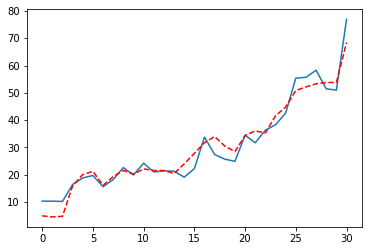

In [22]:
plt.plot( y_data)
plt.plot( model.predict(x_data) ,'r--')
plt.show()

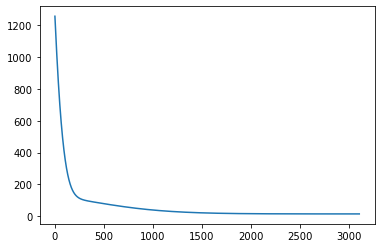

In [23]:
plt.plot(h.history['loss'])

In [24]:
x_pred

array([[ 8.8, 63. ],
       [10.5, 72. ]])

In [25]:
x_pred_scaled

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

In [26]:
model.predict(x_pred_scaled)

array([[ 4.7412157],
       [15.89707  ]], dtype=float32)

# 2. 구간 나누기
- volume이 40 이상이면 크다
- 30이상이면 보통 미만이면 적음으로
- 아래와 같이 출력하시요
- volume  정도

## Numpy version

In [38]:
arr = df['Volume'].values
## 2조건 true false면 where
df['정도'] = np.where( arr >= 40, "크다", "작다")
## 3조건 
df['정도'] = np.select([arr >= 40, 
                     arr >= 30,
                     arr < 30],
                    ['크다', '보통', '적음'])

In [40]:
df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


In [34]:
def fn(v):
    if v < 40:
        return '크다'
    elif v > 30:
        return "보통"
    else: 
        return "적음"

In [35]:
df.정도 = df['Volume'].apply( fn)

In [36]:
df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


In [41]:
df['정도'] = pd.cut(x= df.Volume, bins = [0, 30, 40, 80], labels = ["적음", "보통", "크다"])

In [42]:
df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


# Height  가 가장 작은값과 큰값을 구하시요

In [31]:
df.nlargest(1, 'Height'), df.nsmallest(1, 'Height'), 

(    Girth  Height  Volume  정도
 30   20.6      87    77.0  크다,
    Girth  Height  Volume  정도
 2    8.8      63    10.2  적음)

# girth(테두리) 가 가장큰 top5를 출력하세요(girth, height, volume)

In [37]:
df.nlargest(5, 'Girth', keep = 'all')[['Girth', 'Height', 'Volume']]

,Girth,Height,Volume
30,20.6,87,77.0
28,18.0,80,51.5
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7
